# Import Librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [2]:
titanic_df = pd.read_csv('../Dataset/titanic.csv')
tips_df = pd.read_csv('../Dataset/tips.csv')

In [3]:
titanic_df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


# Measure of Central Tendency (Median, Mean, Mode)

## Mean

In [4]:
titanic_df['age'].mean()

np.float64(29.69911764705882)

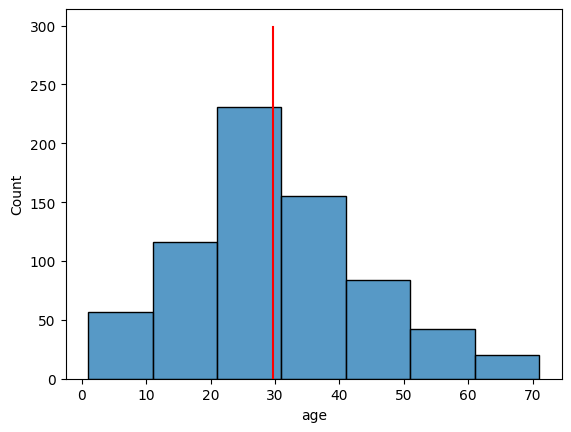

In [5]:
mn = np.mean(titanic_df['age'])
sns.histplot(x = 'age', data=titanic_df, bins=[i for i in range(1, 81, 10)])
plt.plot([mn for i in range(300)], [i for i in range(300)], c = 'red')


plt.show()

In [6]:
titanic_df.fillna({'age': titanic_df['age'].mean()}, inplace=True)

## Median

In [7]:
titanic_df['fare'].median()

np.float64(14.4542)

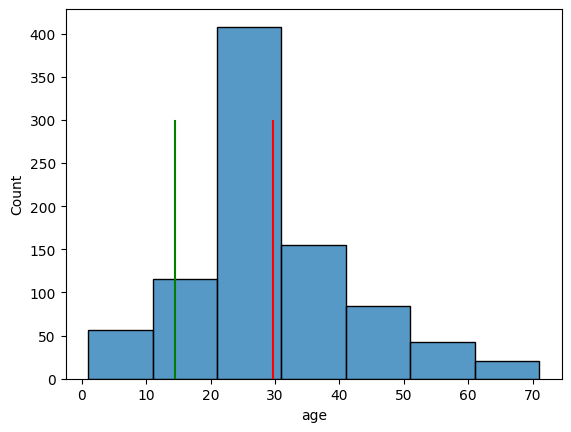

In [8]:
mn = np.mean(titanic_df['age'])
md = np.median(titanic_df['fare'])

sns.histplot(x = 'age', data=titanic_df, bins=[i for i in range(1, 81, 10)])
plt.plot([mn for i in range(300)], [i for i in range(300)], c = 'red')
plt.plot([md for i in range(300)], [i for i in range(300)], c = 'green')

plt.show()

## Mode

In [9]:
mo = titanic_df['fare'].mode()[0]

In [10]:
titanic_df['fare'].value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

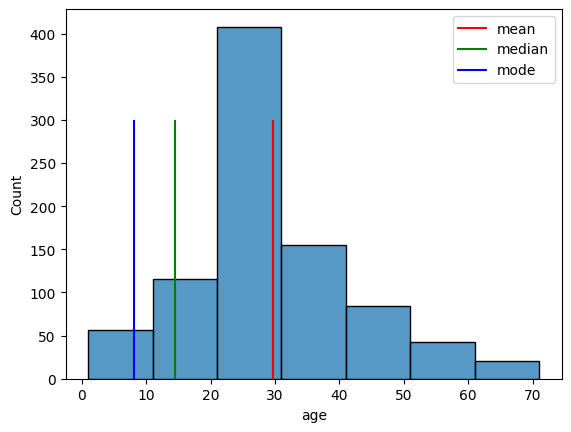

In [11]:
mn = np.mean(titanic_df['age'])
md = np.median(titanic_df['fare'])
mo = titanic_df['fare'].mode()[0]

sns.histplot(x = 'age', data=titanic_df, bins=[i for i in range(1, 81, 10)])
plt.plot([mn for i in range(300)], [i for i in range(300)], c = 'red', label='mean')
plt.plot([md for i in range(300)], [i for i in range(300)], c = 'green', label='median')
plt.plot([mo for i in range(300)], [i for i in range(300)], c = 'blue', label='mode')
plt.legend()

plt.show()

## Range

In [12]:
minimum = titanic_df['age'].min()
maximum = titanic_df['age'].max()

ranges = maximum - minimum
ranges

np.float64(79.58)

# Find Best Dataset

# Measures of Variability

### Note: Whichever database has the lowest standard deviation, MAD, and variance will be the best for us, and we will use that database.

## 1. MAD (Mean Absolute Deviation)

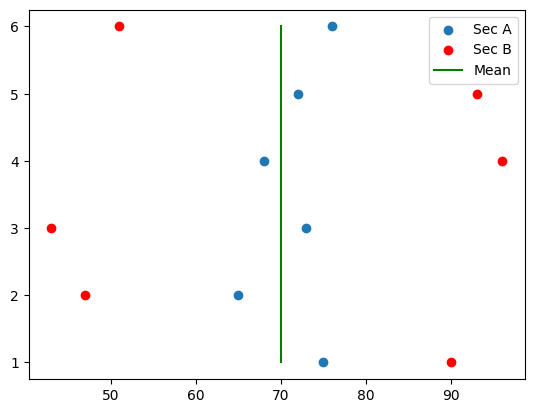

In [13]:
sec_a = np.array([75, 65, 73, 68, 72, 76])
sec_b = np.array([90, 47, 43, 96, 93, 51])
no = np.array([1, 2, 3, 4, 5, 6])
means = np.mean(sec_a) # Both of them mean are same

plt.scatter(x = sec_a, y = no, label='Sec A')
plt.scatter(x = sec_b, y = no, color = 'r', label='Sec B')
plt.plot([70, 70, 70, 70, 70, 70], no, color='green', label='Mean')
plt.legend()

plt.show()

## Mean Absolute Deviation Formula: $$ MAD = \frac{\sum |x_i - \bar{x}|}{n} $$


In [14]:
print(sec_a)
print(sec_a.mean())
print(abs(sec_a.mean()))
np.sum(abs(titanic_df['age'] - titanic_df['age'].mean()))/len(titanic_df['age'])

[75 65 73 68 72 76]
71.5
71.5


np.float64(9.073605334389647)

In [15]:
MAD_a = np.sum(abs(sec_a - sec_a.mean()))/len(sec_a)
MAD_b = np.sum(abs(sec_b - sec_b.mean()))/len(sec_b)

print(MAD_a)
print(MAD_b)

3.3333333333333335
23.0


## 2. Standard Devision Formula: $$ \sigma = \sqrt{\frac{\sum (x_i - \mu)^2}{N}} $$

In [16]:
print(np.std(sec_a), np.std(sec_b))

3.8622100754188224 23.18045153428495


## 3. Variance Formula: $$ \sigma^2 = \frac{\sum (x_i - \mu)}{N} $$

### Note: Standard Devision and Variance both are same there is diffrence is bar -\\|--- or sigma^2 

In [17]:
print(np.var(sec_a), np.var(sec_b))

14.916666666666666 537.3333333333334


### Std ** 2 == Variance

In [18]:
(3.8622100754188224 ) ** 2

14.916666666666666

In [19]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
titanic_df['age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

## Percentile()

In [21]:
np.percentile(titanic_df['age'], 25)

np.float64(22.0)

In [22]:
np.percentile(titanic_df['age'], 75)

np.float64(35.0)

In [23]:
np.percentile(titanic_df['age'], 0) # Minimum Value

np.float64(0.42)

In [24]:
np.percentile(titanic_df['age'], 100) # Maximum Value

np.float64(80.0)

In [25]:
print(titanic_df['age'].median())     # Median
np.percentile(titanic_df['age'], 50)

29.69911764705882


np.float64(29.69911764705882)

In [26]:
titanic_df['age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

## Skewness()

In [27]:
# Skewness stand for how much data is Spred

### Formula of Skewness: $$ \text{Skewness} = \frac{\sum (x_i - \bar{x})^3}{(N - 1) \cdot \sigma^3} $$

### Note: <b>Cumulative Distribution</b> means it is obtained by adding up the frequencies as you move to the value

In [28]:
xis = [1, 3, 5, 7, 8, 9] # 1 + 3 = 4, 4 + 5 = 9, 9 + 7 = 16
cumulative_Distribution_of_xis = [1, 4, 9, 16, 24, 33]

In [29]:
# Negatively skewed / left skewed= mean < median < mode
# Positively skewed / right skewed = mode < median < mean
# Normal = mode = median = mean

In [30]:
titanic_df['age'].skew()

# if it is return Positive value than right skewed
# if it is return Negative value than left skewed

np.float64(0.4344880940129925)

In [31]:
x = [2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12]

x_df = pd.DataFrame(x)

In [32]:
x_df.skew()

print(x_df.mean(), x_df.median(), x_df.mode())

0    7.0
dtype: float64 0    7.0
dtype: float64    0
0  7


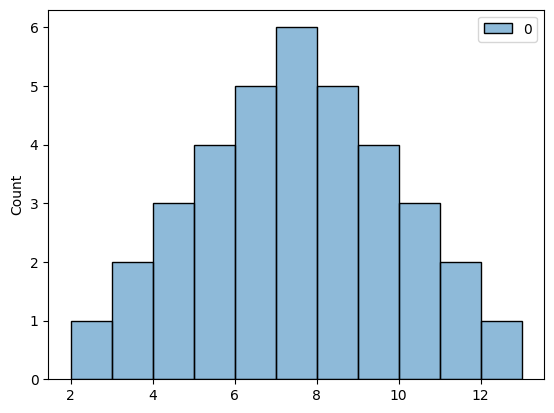

In [33]:
sns.histplot(x_df, bins = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

plt.show() # Here we can show mean = median = mode this is normal skewed

## Random Variables

In [34]:
# Note: there are two type of Randome Variable   
# 1. Discret Variable: Countable number of distinct values. ex. Dice, Passo
# 2. Value that in given range and Interval ex. 2.3, 5.2 but in range

## Probaility:

### Formula of Probaility: $$ P(A) = \frac{\text{Number of times A occurs}}{\text{Total number of possible outcomes}} $$

In [35]:
# in dice probaility of 4 is 1/6

## Probability Distribution & Function

In [36]:
# Note: There are two types of Probability Distribution:
# 1. Discrete Probability Distribution -- netural value
# 2. Continuous Probability Distribution -- Floating Value

In [37]:
# Note: There are Three type of Probability Function:
# 1. Probability Density Function (PDF)
# 2. Probability Mass Function (PMF)
# 3. Cumulative Density Function (CDF)

# Covariance and Correlation

## Covariance

### Note: covariance signifies the direction of the linear relationsip between the two variables.

### Formula: $$ \text{Cov}(x,y) = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{N} $$

In [38]:
# we have two columns x and y. 
# if x increase and y also increase then it's clled Positive Covariance
# if x decrease and y increase then it's called Nagative Covarance
# if x change but y have same value (y stable) then it's called zero(0) no-Covariance
# Data range in -∞ to +∞

## Correlation

### Formula: $$\text{Correlation} = \frac{\text{Cov}(x,y)}{\sigma_x \cdot \sigma_y}$$

In [39]:
# Note: Covariation and Correlation is almost same but main difference is range 
# Correlaton have value only in (-1 to 1) to Analysis better than Covariation

In [40]:
# 0 to -0.5 --> Week Negative Correlation
# -0.5 to -1 --> Strong Negative Correlation
# 0 to 0.5 --> week Positive Correlation
# 0.5 to 1 --> Strong Positive Correlation

In [41]:
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [42]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [43]:
tips_corr = tips_df.select_dtypes(['float64', 'int64']).corr()
tips_corr
# Find correlation here all of them value between 0 to 1

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [44]:
tips_cov = tips_df.select_dtypes(['float64', 'int64']).cov()
tips_cov
# Find Covariance of data range infinity

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


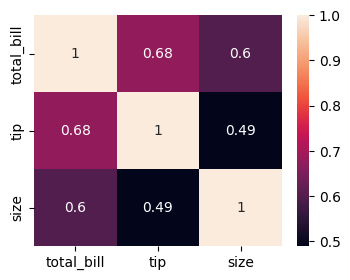

In [45]:
# Correlation of tips_corr Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(tips_corr, annot=True)
plt.show()

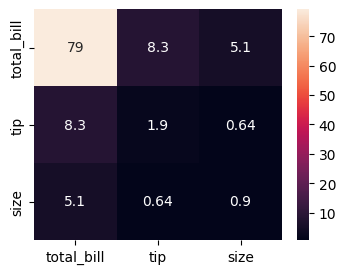

In [46]:
# Covariation of tips_corr Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(tips_cov, annot=True)
plt.show()

## Central Limit Theorem (CLT)

In [47]:
# Centeral limit theorem is known as cut population data into sample data and find mean both are almost same
# Condition:
# 1. We must need to choose data Randomaly not contiously
# 2. Sample data is no more than 10%
# 3. we must need to select more than 30 record

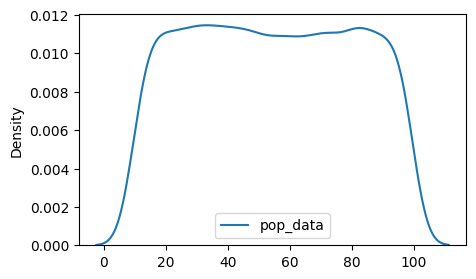

In [48]:
# Let's create Synthetic Data
pop_data = np.random.randint(10, 100, size=10000)

pop_table = pd.DataFrame({'pop_data':pop_data})

plt.figure(figsize=(5, 3))
sns.kdeplot(pop_table)
plt.show()

In [49]:
print(pop_data)

[39 84 37 ... 98 64 74]


In [50]:
Sample_M = []
for i in range(100):
    Sample_test = []
    for j in range(500):
        Sample_test.append(np.random.choice(pop_data))
    Sample_M.append(np.mean(Sample_test))
print(Sample_M)
print(np.mean(pop_table))
print(np.mean(Sample_M))

[np.float64(54.136), np.float64(54.368), np.float64(54.574), np.float64(52.31), np.float64(52.326), np.float64(53.532), np.float64(54.126), np.float64(55.972), np.float64(54.276), np.float64(52.436), np.float64(54.14), np.float64(54.844), np.float64(52.452), np.float64(55.06), np.float64(54.97), np.float64(54.096), np.float64(54.868), np.float64(53.604), np.float64(56.694), np.float64(54.296), np.float64(54.732), np.float64(55.39), np.float64(52.914), np.float64(53.148), np.float64(54.442), np.float64(55.038), np.float64(52.806), np.float64(55.598), np.float64(54.224), np.float64(55.394), np.float64(52.77), np.float64(53.238), np.float64(53.16), np.float64(54.834), np.float64(53.12), np.float64(52.762), np.float64(54.66), np.float64(53.85), np.float64(54.566), np.float64(55.502), np.float64(54.388), np.float64(55.198), np.float64(55.268), np.float64(53.85), np.float64(53.87), np.float64(55.634), np.float64(54.232), np.float64(54.822), np.float64(54.658), np.float64(53.898), np.float64(

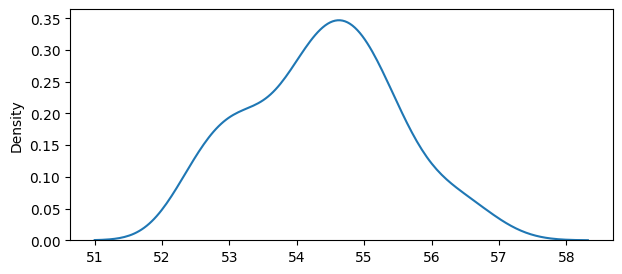

In [51]:
plt.figure(figsize=(7, 3))
sns.kdeplot(Sample_M)
plt.show()

## Hypothesis Testing

In [54]:
# There are two Terminology used in Hypotesis Testing:
# 1. Null Hypothesis: It's a Stastical Theory that Sudggests there is no stastical significance exists between two population. 
#                it's value is 0. also known as 'H0', most sign used: =, >=, <=
# 2. Alternative Hypothesis: it's sudgest there is a s ignificance difference between the Population Parameters. 
#                it's also known as (H1), most sign used: !=, <, >

# there is mainly three way to find:
# 1. Z-Test
# 2. T-Test
# 3. Chi Square Test

### Step of Hypothesis Testing:

In [ ]:
# State null(H0) and alternative(H1) hypothesis
# Choose level of significance(a)
# Find critical values
# Find test statistic
# Draw your conclusion

### Z-Test Algorithm: $$ t = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} $$

In [55]:
# In This algo:
# x̄ = Sample Mean
# μ = Population Mean
# σ = Population standard Deviasion
# n = Number of Sample data

In [58]:
# Example:
# A teacher claims that the mean score of students in his class is greater than 82
# with a standard deviation of 20. A sample of 81 students was selected 
# with a mean score of 90.

# Step 1: Define the hypotheses
# H0: μ = 82   (mean score is 82)
# H1: μ > 82   (mean score is greater than 82)

# Step 2: Given values
s_x = 90      # sample mean (x̄)
p_u = 82      # population mean (μ)
p_std = 20    # population standard deviation (σ)
n = 81        # sample size

# Step 3: Calculate Z-test statistic
z_cal = (s_x - p_u) / (p_std / np.sqrt(n))
print("Calculated Z value:", z_cal)


Calculated Z value: 3.5999999999999996
